# Exercise: residuals normality tests

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by Xavier Luri (ICCUB)

You are provided with three samples: SampleA.csv, SampleB.csv, SampleC.csv

Each sample is a simulation of the measurement of the relation between two quantities $V$ and $I$ that theory tells us is as: 

$I = 1 + 10V$

We have three experimental setups (A,B,C) such that for each value of V (assumed errorless) in each set the errors in the measurement of $I$ have different characteristics. 


![](./Samples.png)


Solution:

* Sample A residuals are generated using a Cauchy distribution C(0,1)
* Sample B residuals are generated using a normal distibution N(0,5)
* Sample C residuals are generated using 90\% of points following a normal distribution N(0,5) and 10\% of points as "outliers" following a normal distribution N(0,10)


Shapiro-Wilks test
Sample A: p-value 0.000%
Sample B: p-value 18.052%
Sample C: p-value 39.838%


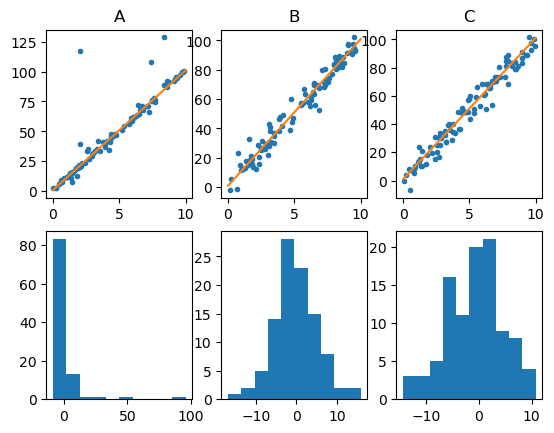

In [37]:
%matplotlib inline
import pandas as pd
import scipy.stats as scp
import matplotlib.pyplot as plt

# Read the csv files using pandas
A = pd.read_csv('SampleA.csv')
B = pd.read_csv('SampleB.csv')
C = pd.read_csv('SampleC.csv')
            
# Calculate residuals
rA= A['I'] - ( 1 + 10*A['V'])     
rB= B['I'] - ( 1 + 10*B['V'])     
rC= C['I'] - ( 1 + 10*C['V'])     

# Plot histograms
plt.subplot(2,3,1)
plt.title("A")
plt.plot(A['V'],A['I'],".")
plt.plot([0,10],[1,101],"-")
plt.subplot(2,3,4)
plt.hist(rA)

plt.subplot(2,3,2)
plt.title("B")
plt.plot(B['V'],B['I'],".")
plt.plot([0,10],[1,101],"-")
plt.subplot(2,3,5)
plt.hist(rB)

plt.subplot(2,3,3)
plt.title("C")
plt.plot(C['V'],C['I'],".")
plt.plot([0,10],[1,101],"-")
plt.subplot(2,3,6)
plt.hist(rC)

# Normality tests
print("Shapiro-Wilks test")
print("Sample A: p-value {0:.3f}%".format(100*scp.shapiro(rA)[1]))
print("Sample B: p-value {0:.3f}%".format(100*scp.shapiro(rB)[1]))
print("Sample C: p-value {0:.3f}%".format(100*scp.shapiro(rC)[1]))